로우데이터 엑셀 업로드(.xlsx)


Saving 202501_clean2.xlsx to 202501_clean2 (4).xlsx

===== Monte Carlo 난수 샘플 (금속별 농도, µg/m³) =====
Cr: [0.004478, 0.003939, 0.003286, 0.002194, 0.002392, 0.00334 , 0.005325,
 0.00482 , 0.002036, 0.002763]
Cr(VI): [0.00064 , 0.000563, 0.000469, 0.000313, 0.000342, 0.000477, 0.000761,
 0.000689, 0.000291, 0.000395]
Co: [0.008667, 0.008902, 0.009399, 0.00697 , 0.009374, 0.007368, 0.00857 ,
 0.008538, 0.005973, 0.007523]
Ni: [0.00252 , 0.003042, 0.0041  , 0.002942, 0.00288 , 0.004842, 0.003017,
 0.006021, 0.004158, 0.003079]
Cd: [0.169362, 0.148807, 0.271378, 0.159489, 0.193007, 0.158352, 0.283371,
 0.158383, 0.254339, 0.237312]
Sb: [0.031234, 0.034029, 0.018849, 0.025931, 0.005178, 0.00427 , 0.01234 ,
 0.025133, 0.004386, 0.003572]
Pb: [0.005431, 0.006097, 0.003891, 0.000357, 0.023734, 0.004473, 0.011655,
 0.004276, 0.002562, 0.010676]

===== Monte Carlo 난수 샘플 (Time outdoors, min/day) =====
0-<1: [24., 24., 24., 24., 24., 24., 24., 24., 24., 24.]
1-<2: [84., 84., 84., 84., 84., 84., 84., 

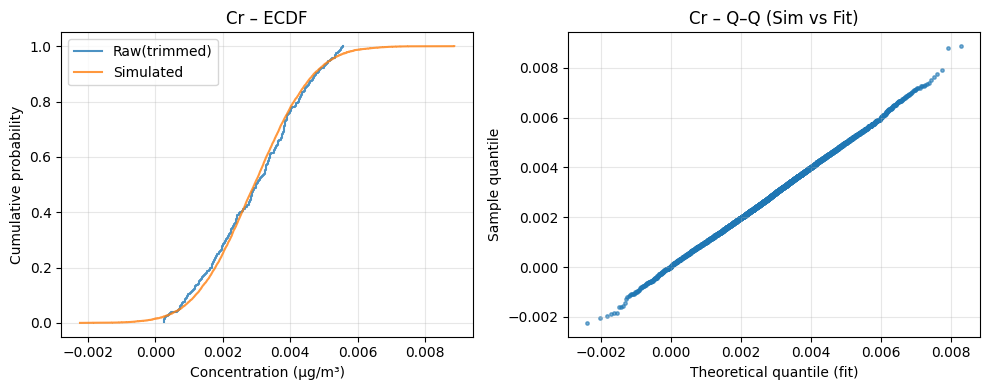


[C 검증] Cr(VI)
Raw(trimmed)       mean=0.000420442, median=0.000428571, p5=0.000103429, p95=0.000741714
Fitted(theory)   없음/피팅불가
Simulated(C_sims)  mean=0.00042063, median=0.000419833, p5=0.000104157, p95=0.00074391


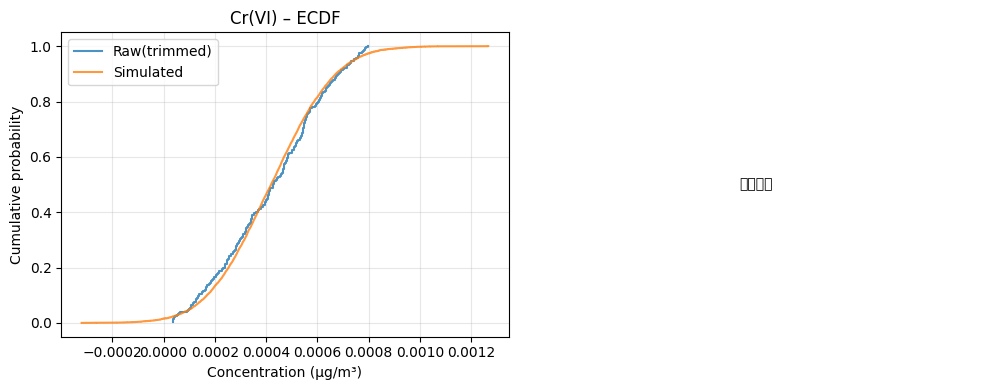


[C 검증] Co
Raw(trimmed)       mean=0.00767117, median=0.00757, p5=0.002722, p95=0.013237
Fitted(theory)     mean=0.00768985, median=0.00751628, p5=0.0027446, p95=0.0132423
Simulated(C_sims)  mean=0.00768567, median=0.00749167, p5=0.00280133, p95=0.0133385


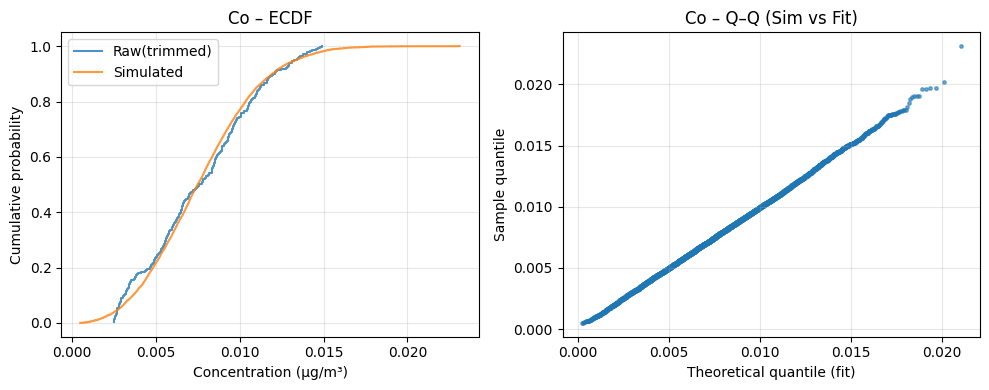


[C 검증] Ni
Raw(trimmed)       mean=0.00292505, median=0.00264, p5=0.000745, p95=0.005685
Fitted(theory)     mean=0.00293362, median=0.00276321, p5=0.000767658, p95=0.00567698
Simulated(C_sims)  mean=0.00290409, median=0.0027316, p5=0.000744275, p95=0.00566471


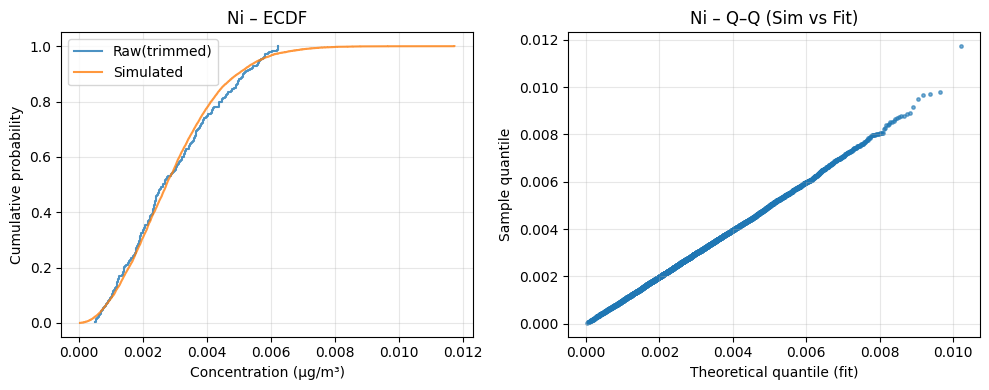


[C 검증] Cd
Raw(trimmed)       mean=0.212647, median=0.20918, p5=0.151387, p95=0.287854
Fitted(theory)     mean=0.214011, median=0.210764, p5=0.148884, p95=0.289723
Simulated(C_sims)  mean=0.213594, median=0.208709, p5=0.148525, p95=0.289411


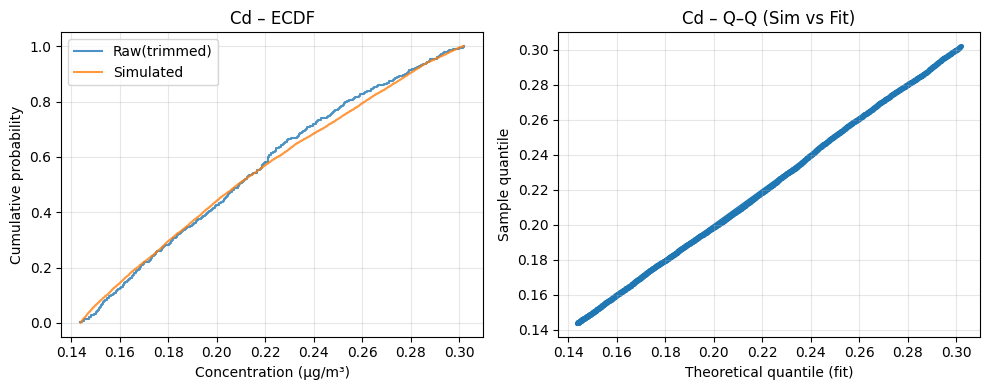


[C 검증] Sb
Raw(trimmed)       mean=0.0165311, median=0.01611, p5=0.002277, p95=0.035147
Fitted(theory)     mean=0.0170746, median=0.0153108, p5=0.00182769, p95=0.0378487
Simulated(C_sims)  mean=0.016949, median=0.0151429, p5=0.00182498, p95=0.0377748


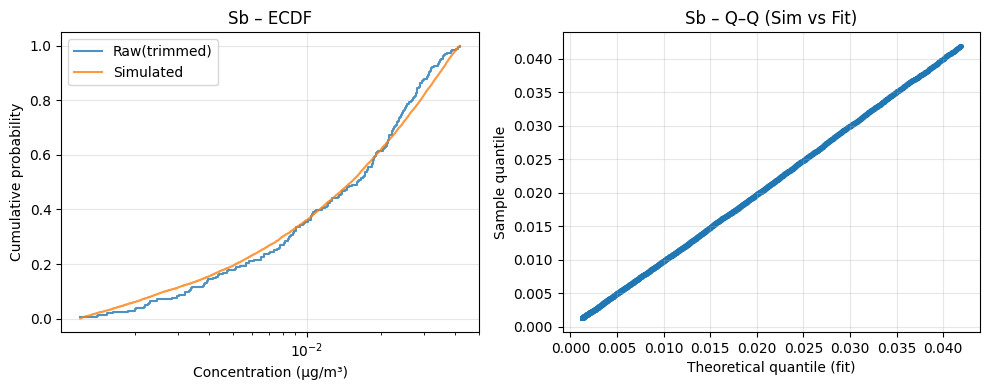


[C 검증] Pb
Raw(trimmed)       mean=0.0082825, median=0.00653, p5=0.0010025, p95=0.024595
Fitted(theory)     mean=0.00826367, median=0.00650244, p5=0.000942869, p95=0.0217048
Simulated(C_sims)  mean=0.00837538, median=0.00647554, p5=0.000948727, p95=0.0221154


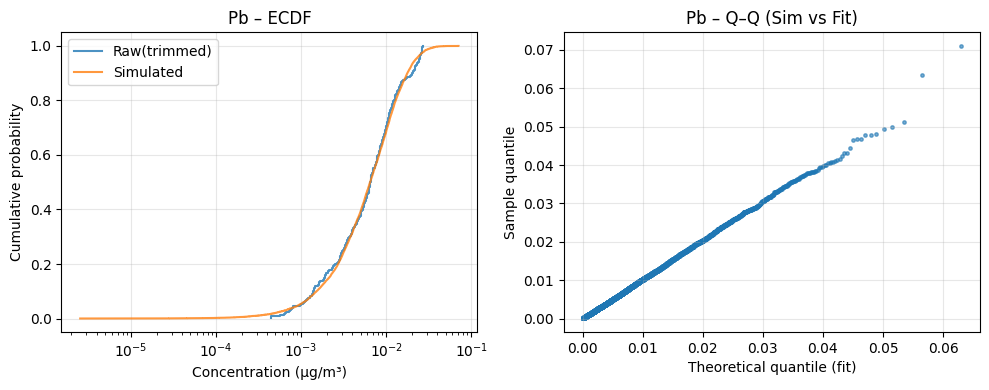


[Cr(VI) 특수검증] median( C(Cr(VI))/C(Cr) ) = 0.142857 (이론=1/7≈0.142857)

===== Time outdoors 난수 분포 검증 =====
Age        Mean(sample)   P5(sample)  P95(sample)  Target Mean  Target 95th
0-<1             24.000       24.000       24.000         24.0         24.0
1-<2             84.000       84.000       84.000         84.0         84.0
2-<3            120.000      120.000      120.000        120.0        120.0
3-<6            108.000      108.000      108.000        108.0        108.0
6-<11           132.000      132.000      132.000        132.0        132.0
11-<16          102.000      102.000      102.000        102.0        102.0
16-<18          102.000      102.000      102.000        102.0        102.0
18-<25           87.538       14.763      247.635          ---        250.0
25-<35           66.968        6.697      217.452          ---        220.0
35-<45           59.277        5.831      193.038          ---        195.0
45-<55           78.674        6.508      275.900         

In [ ]:
from google.colab import files
import os, re, json, math, warnings, glob, shutil
import numpy as np, pandas as pd
from scipy import stats
from scipy.stats import (gumbel_r, gumbel_l, lognorm, weibull_min, logistic, t,
                         norm, gamma, beta, triang, expon, pareto, uniform, chi2)
from openpyxl import Workbook
from openpyxl.styles import Font, Alignment, PatternFill, Border, Side
from openpyxl.worksheet.table import Table, TableStyleInfo
warnings.filterwarnings("ignore")

np.random.seed(20250912)
N_SIM = 10_000
BOOTSTRAP_B = 200
IUR = {"Cr(VI)":1.20e-02,"Co":9.00e-03,"Ni":2.40e-04,"As":4.30e-03,"Cd":1.80e-03,"Sb":2.29e-06,"Pb":1.20e-05}
ORDER = ['Cr','Cr(VI)','Co','Ni','As','Cd','Sb','Pb']
PAT = {
    "Cr(VI)": r"(?:\bCr\s*\(?VI\)?\b|Cr(?:\s*-?\s*)?6\+?|Hexa(?:valent)?\s*Chrom(?:ium)?)",
    "Cr"    : r"(?:\bCr\b(?!\s*\(?VI\)?))",
    "Co"    : r"(?:\bCo\b|Cobalt)",
    "Ni"    : r"(?:\bNi\b|Nickel)",
    "As"    : r"(?:\bAs\b|Arsenic)",
    "Cd"    : r"(?:\bCd\b|Cadmium)",
    "Sb"    : r"(?:\bSb\b|Antimony)",
    "Pb"    : r"(?:\bPb\b|Lead)"}

POS_ONLY = {'로그 정규','와이블','감마','지수','파레토'}

# Excel style
HEADER_BLUE = '2F5597'
BEST_FILL  = 'FFF2CC'
THIN_GRAY  = '999999'
TABLE_STYLE = "TableStyleMedium9"

# Exposure params
EF_days_per_year = 350; EF = EF_days_per_year/365.0
LT_years = 78.6
ACT_POINT = {"0-<1":24,"1-<2":84,"2-<3":120,"3-<6":108,"6-<11":132,"11-<16":102,"16-<18":102}  # min/day
ACT_LN_P5_P95 = {"18-<25":(14.455,250.0),"25-<35":(6.516,220.0),"35-<45":(5.789,195.0),
                 "45-<55":(6.401,260.0),"55-<65":(8.083,350.0),"65-<78.6":(6.094,390.0)}
ED_years = {"0-<1":1,"1-<2":1,"2-<3":1,"3-<6":3,"6-<11":5,"11-<16":5,"16-<18":2,
            "18-<25":7,"25-<35":10,"35-<45":10,"45-<55":10,"55-<65":10,"65-<78.6":13.6}
AGE_ORDER=["0-<1","1-<2","2-<3","3-<6","6-<11","11-<16","16-<18","18-<25","25-<35","35-<45","45-<55","55-<65","65-<78.6"]
def ADAF(lbl):
    a = float(lbl.split('-')[0])
    if a < 2:       # 0–<1, 1–<2
        return 10.0
    elif a < 18:    # 2–<3, 3–<6, 6–<11, 11–<16, 16–<18
        return 3.0
    else:           # 18세 이상
        return 1.0

# 연령 그룹(Infant/Child/Adult)
INFANT = ["0-<1","1-<2"]
CHILD  = ["2-<3","3-<6","6-<11","11-<16","16-<18"]
ADULT  = ["18-<25","25-<35","35-<45","45-<55","55-<65","65-<78.6"]

# RNG helper
_master_rs = np.random.RandomState(20250912)
def child_rs(): return np.random.RandomState(_master_rs.randint(0, 2**31-1))

# 데이터 로드
print("로우데이터 엑셀 업로드(.xlsx)")
up = files.upload()
INPUT = next((k for k in up if k.lower().endswith(('.xlsx','.xls'))), None)
if INPUT is None:
    cand = sorted(glob.glob("*.xlsx"))
    if not cand: raise FileNotFoundError("엑셀(.xlsx/.xls) 파일을 찾지 못했습니다.")
    INPUT = cand[-1]
raw = pd.read_excel(INPUT)

# helpers
def find_col(df, regex):
    for c in df.columns:
        if re.search(regex, str(c), flags=re.I): return c
    return None

def to_ug(series, name):
    s = pd.to_numeric(series, errors='coerce').replace([np.inf,-np.inf], np.nan)
    if re.search(r'(?i)\bng\b|ng/?m', str(name)):  # ng → µg
        return (s/1000.0, 'converted_from_ng')
    return (s, 'as_is_ug')

def hist_mode_estimate(x):
    x=np.asarray(x,float); x=x[np.isfinite(x)]
    if x.size<2: return float(np.nanmedian(x)) if x.size else np.nan
    iqr=np.subtract(*np.percentile(x,[75,25]))
    bins=max(10,int(np.sqrt(x.size))) if iqr<=0 else max(10,int(np.ceil((x.max()-x.min())/(2*iqr*x.size**(-1/3)))) )
    cnt,edges=np.histogram(x,bins=bins); i=int(cnt.argmax())
    return float((edges[i]+edges[i+1])/2)

# preprocess: unit + trim + derive Cr(VI)
series_map, log_rows = {}, []
for m in ORDER:
    c = find_col(raw, PAT.get(m, r"^"))
    if c is None: log_rows.append((m, None, 'missing', 0, np.nan)); continue
    v, how = to_ug(raw[c], c); series_map[m]=v
    log_rows.append((m, c, how, int(v.notna().sum()), float(np.nanmean(v))))
log = pd.DataFrame(log_rows, columns=['Metal','Matched_Column','Unit_Status','N_nonNa','Mean(ug/m3)'])

trimmed={}; q5_map={}; q95_map={}; mode_map={}
for m,s in series_map.items():
    x=s.dropna(); x=x[x>0]
    if x.size==0: continue
    q5,q95=np.percentile(x,[5,95]); xe=x[(x>=q5)&(x<=q95)]
    if xe.size==0: continue
    trimmed[m]=xe
    q5_map[m]=float(q5); q95_map[m]=float(q95); mode_map[m]=float(hist_mode_estimate(xe))

# Cr(VI) 추가 (트리밍 후)
if 'Cr' in trimmed and (('Cr(VI)' not in trimmed) or trimmed['Cr(VI)'].empty):
    trimmed['Cr(VI)']=trimmed['Cr']/7.0
    q5_map['Cr(VI)']=q5_map.get('Cr', np.nan)/7.0 if 'Cr' in q5_map else np.nan
    q95_map['Cr(VI)']=q95_map.get('Cr', np.nan)/7.0 if 'Cr' in q95_map else np.nan
    mode_map['Cr(VI)']=mode_map.get('Cr', np.nan)/7.0 if 'Cr' in mode_map else np.nan

# 로우데이터 vs 극단값 전처리 시트 구성
def find_first(df, pattern):
    for c in df.columns:
        if re.search(pattern, str(c), flags=re.I):
            return c
    return None

col_pbeg = find_first(raw, r'pump[-_\s]?begin|^begin\b|start time')
col_pend = find_first(raw, r'pump[-_\s]?end|^end\b|stop time')
col_mrst = find_first(raw, r'mass\s*reset|massresett?ime|reset\s*time')
col_conc = find_first(raw, r'^conc\b.*')

meta_cols = []
if col_pbeg: meta_cols.append(raw[col_pbeg].rename('Pump-Begin'))
if col_pend: meta_cols.append(raw[col_pend].rename('Pump-End'))
if col_mrst: meta_cols.append(raw[col_mrst].rename('MassResetTime'))
if col_conc:
    name_lower = str(col_conc).lower()
    conc_series = pd.to_numeric(raw[col_conc], errors='coerce')
    if 'ng' in name_lower:
        conc_series = conc_series / 1000.0  # 단위 환산만; 트리밍 없음
    meta_cols.append(conc_series.rename('Conc(µg/m³)'))
meta_df = pd.concat(meta_cols, axis=1) if meta_cols else pd.DataFrame()

comp_cols=[]
for m in ORDER:
    raw_col = find_col(raw, PAT.get(m, r"^"))
    if raw_col is None:
        comp_cols.append(pd.Series(dtype=float, name=f"{m} (raw, µg/m³)"))
        comp_cols.append(pd.Series(dtype=float, name=f"{m} (pre, µg/m³)"))
        continue
    raw_ug,_ = to_ug(raw[raw_col], raw_col)
    pre = trimmed[m].reindex(raw.index) if m in trimmed else pd.Series(index=raw.index, dtype=float)
    comp_cols.append(raw_ug.rename(f"{m} (raw, µg/m³)"))
    comp_cols.append(pre.rename(f"{m} (pre, µg/m³)"))
metals_df = pd.concat(comp_cols, axis=1)
comp = pd.concat([meta_df, metals_df], axis=1)
comp.columns = [str(c) for c in comp.columns]  # MultiIndex 방지

os.makedirs("preprocessed", exist_ok=True)
with pd.ExcelWriter("preprocessed/preprocessed_data.xlsx") as w:
    comp.to_excel(w, sheet_name="원자료 vs 전처리", index=False)
log.to_excel("preprocessed/preprocess_log.xlsx", index=False)

# Distribution wrappers & AD bootstrap
class D:
    def __init__(self,name): self.name=name; self.p={}; self.np=None; self.valid=False
    def ok(self,p,np_): self.p=p; self.np=np_; self.valid=True; return self
    def cdf(self,z): raise NotImplementedError
    def ppf(self,q): raise NotImplementedError
    def rvs(self,n,rs=None): raise NotImplementedError

class LogNormal(D):
    def __init__(self): super().__init__('로그 정규')
    def fit(self,x):
        x=x[x>0]
        try: s,loc,sc=lognorm.fit(x, floc=0); assert s>0 and sc>0; return self.ok({'s':s,'scale':sc},2)
        except: return self
    def cdf(self,z): return lognorm.cdf(z, s=self.p['s'], loc=0, scale=self.p['scale'])
    def ppf(self,q): return lognorm.ppf(q, s=self.p['s'], loc=0, scale=self.p['scale'])
    def rvs(self,n,rs=None): return lognorm.rvs(self.p['s'], loc=0, scale=self.p['scale'], size=n, random_state=rs)

class Weibull(D):
    def __init__(self): super().__init__('와이블')
    def fit(self,x):
        x=x[x>0]
        try: c,loc,sc=weibull_min.fit(x, floc=0); assert c>0 and sc>0; return self.ok({'c':c,'scale':sc},2)
        except: return self
    def cdf(self,z): return weibull_min.cdf(z, c=self.p['c'], loc=0, scale=self.p['scale'])
    def ppf(self,q): return weibull_min.ppf(q, c=self.p['c'], loc=0, scale=self.p['scale'])
    def rvs(self,n,rs=None): return weibull_min.rvs(self.p['c'], loc=0, scale=self.p['scale'], size=n, random_state=rs)

class Gamma_(D):
    def __init__(self): super().__init__('감마')
    def fit(self,x):
        x=x[x>0]
        try: a,loc,sc=gamma.fit(x, floc=0); assert a>0 and sc>0; return self.ok({'a':a,'scale':sc},2)
        except: return self
    def cdf(self,z): return gamma.cdf(z, a=self.p['a'], loc=0, scale=self.p['scale'])
    def ppf(self,q): return gamma.ppf(q, a=self.p['a'], loc=0, scale=self.p['scale'])
    def rvs(self,n,rs=None): return gamma.rvs(self.p['a'], loc=0, scale=self.p['scale'], size=n, random_state=rs)

class LogisticD(D):
    def __init__(self): super().__init__('로지스틱')
    def fit(self,x):
        try: loc,sc=logistic.fit(x); assert sc>0; return self.ok({'loc':loc,'scale':sc},2)
        except: return self
    def cdf(self,z): return logistic.cdf(z, **self.p)
    def ppf(self,q): return logistic.ppf(q, **self.p)
    def rvs(self,n,rs=None): return logistic.rvs(size=n, **self.p, random_state=rs)

class NormalD(D):
    def __init__(self): super().__init__('정규')
    def fit(self,x):
        try: mu,sig=norm.fit(x); assert sig>0; return self.ok({'loc':mu,'scale':sig},2)
        except: return self
    def cdf(self,z): return norm.cdf(z, **self.p)
    def ppf(self,q): return norm.ppf(q, **self.p)
    def rvs(self,n,rs=None): return norm.rvs(size=n, **self.p, random_state=rs)

class StudentT(D):
    def __init__(self): super().__init__('스튜던트의 t')
    def fit(self,x):
        try: df_,loc,sc=t.fit(x); assert df_>0 and sc>0; return self.ok({'df':df_,'loc':loc,'scale':sc},3)
        except: return self
    def cdf(self,z): return t.cdf(z, **self.p)
    def ppf(self,q): return t.ppf(q, **self.p)
    def rvs(self,n,rs=None): return t.rvs(size=n, **self.p, random_state=rs)

class Exponential_(D):
    def __init__(self): super().__init__('지수')
    def fit(self,x):
        x=x[x>0]
        try: loc,sc=expon.fit(x, floc=0); assert sc>0; return self.ok({'scale':sc},1)
        except: return self
    def cdf(self,z): return expon.cdf(z, loc=0, scale=self.p['scale'])
    def ppf(self,q): return expon.ppf(q, loc=0, scale=self.p['scale'])
    def rvs(self,n,rs=None): return expon.rvs(size=n, loc=0, scale=self.p['scale'], random_state=rs)

class BetaPERT_(D):
    def __init__(self,lam=4.0): super().__init__('BetaPERT'); self.lam=lam
    def fit(self,x):
        a,b=float(np.min(x)),float(np.max(x));
        if not(np.isfinite(a) and np.isfinite(b) and b>a): return self
        m=float(np.clip(hist_mode_estimate(x), a+1e-9, b-1e-9))
        al=1+self.lam*(m-a)/(b-a); be=1+self.lam*(b-m)/(b-a)
        if al<=0 or be<=0: return self
        return self.ok({'a':a,'b':b,'alpha':al,'beta':be,'m':m},2)
    def cdf(self,z): return beta.cdf((z-self.p['a'])/(self.p['b']-self.p['a']), self.p['alpha'], self.p['beta'])
    def ppf(self,q): return self.p['a']+(self.p['b']-self.p['a'])*beta.ppf(q, self.p['alpha'], self.p['beta'])
    def rvs(self,n,rs=None):
        r=beta.rvs(self.p['alpha'], self.p['beta'], size=n, random_state=rs)
        return self.p['a']+(self.p['b']-self.p['a'])*r

class Triangular_(D):
    def __init__(self): super().__init__('삼각형')
    def fit(self,x):
        a,b=float(np.min(x)),float(np.max(x))
        if not(np.isfinite(a) and np.isfinite(b) and b>a): return self
        m=float(np.clip(hist_mode_estimate(x), a+1e-9, b-1e-9)); c=(m-a)/(b-a)
        if not(0<c<1): return self
        return self.ok({'a':a,'b':b,'m':m,'c':c},3)
    def cdf(self,z): return triang.cdf(z, c=self.p['c'], loc=self.p['a'], scale=(self.p['b']-self.p['a']))
    def ppf(self,q): return triang.ppf(q, c=self.p['c'], loc=self.p['a'], scale=(self.p['b']-self.p['a']))
    def rvs(self,n,rs=None): return triang.rvs(self.p['c'], loc=self.p['a'], scale=(self.p['b']-self.p['a']), size=n, random_state=rs)

class Uniform_(D):
    def __init__(self): super().__init__('균일')
    def fit(self,x):
        a,b=float(np.min(x)),float(np.max(x))
        if not(np.isfinite(a) and np.isfinite(b) and b>a): return self
        return self.ok({'loc':a,'scale':(b-a)},2)
    def cdf(self,z): return uniform.cdf(z, **self.p)
    def ppf(self,q): return uniform.ppf(q, **self.p)
    def rvs(self,n,rs=None): return uniform.rvs(size=n, **self.p, random_state=rs)

class GumbelR_(D):
    def __init__(self): super().__init__('최대 극값')
    def fit(self,x):
        try: loc,sc=gumbel_r.fit(x); assert np.isfinite(loc) and sc>0; return self.ok({'loc':loc,'scale':sc},2)
        except: return self
    def cdf(self,z): return gumbel_r.cdf(z, **self.p)
    def ppf(self,q): return gumbel_r.ppf(q, **self.p)
    def rvs(self,n,rs=None): return gumbel_r.rvs(size=n, **self.p, random_state=rs)

class GumbelL_(D):
    def __init__(self): super().__init__('최소 극값')
    def fit(self,x):
        try: loc,sc=gumbel_l.fit(x); assert np.isfinite(loc) and sc>0; return self.ok({'loc':loc,'scale':sc},2)
        except: return self
    def cdf(self,z): return gumbel_l.cdf(z, **self.p)
    def ppf(self,q): return gumbel_l.ppf(q, **self.p)
    def rvs(self,n,rs=None): return gumbel_l.rvs(size=n, **self.p, random_state=rs)

class Beta_(D):
    def __init__(self): super().__init__('베타')
    def fit(self,x):
        a,b=float(np.min(x)),float(np.max(x))
        if not(np.isfinite(a) and np.isfinite(b) and b>a): return self
        z=np.clip((x-a)/(b-a), 1e-9, 1-1e-9)
        try: al,be,_,_ = beta.fit(z, floc=0, fscale=1); assert al>0 and be>0;
        except: return self
        return self.ok({'a':a,'b':b,'alpha':al,'beta':be},2)
    def cdf(self,z):
        zz=(z-self.p['a'])/(self.p['b']-self.p['a'])
        return beta.cdf(zz, self.p['alpha'], self.p['beta'])
    def ppf(self,q):
        return self.p['a']+(self.p['b']-self.p['a'])*beta.ppf(q, self.p['alpha'], self.p['beta'])
    def rvs(self,n,rs=None):
        r=beta.rvs(self.p['alpha'], self.p['beta'], size=n, random_state=rs)
        return self.p['a']+(self.p['b']-self.p['a'])*r

class Pareto_(D):
    def __init__(self): super().__init__('파레토')
    def fit(self,x):
        x=x[x>0]
        try: b,loc,sc=pareto.fit(x, floc=0); assert b>0 and sc>0; return self.ok({'b':b,'scale':sc},2)
        except: return self
    def cdf(self,z): return pareto.cdf(z, b=self.p['b'], loc=0, scale=self.p['scale'])
    def ppf(self,q): return pareto.ppf(q, b=self.p['b'], loc=0, scale=self.p['scale'])
    def rvs(self,n,rs=None): return pareto.rvs(self.p['b'], loc=0, scale=self.p['scale'], size=n, random_state=rs)

def AD_stat(x, cdf, eps=1e-12):
    x=np.sort(np.asarray(x,float)); n=x.size
    if n<5: return np.inf
    u=np.clip(cdf(x),eps,1-eps); i=np.arange(1,n+1)
    return float(-n - np.sum((2*i-1)*(np.log(u)+np.log(1-u[::-1])))/n)

def AD_p_boot_refit(x, dist_obj, B=BOOTSTRAP_B):
    x=np.asarray(x,float); n=x.size
    if n<5 or not dist_obj.valid: return np.nan
    A2_obs=AD_stat(x, dist_obj.cdf); ge=0; m=0
    for _ in range(B):
        rs=child_rs(); xs=dist_obj.rvs(n, rs=rs)
        d=type(dist_obj)(); d.fit(xs)
        if not d.valid: continue
        A2_bs=AD_stat(xs, d.cdf); ge+=(A2_bs>=A2_obs); m+=1
    return float((ge+1)/(m+1)) if m>0 else np.nan

def KS_stat_p(x,d):
    try: D,p=stats.kstest(x, lambda z: d.cdf(z)); return float(D), float(p)
    except: return np.nan,np.nan

def Chi2_stat_p(x,d):
    try:
        n=len(x); N=max(5,min(50,n//5)); eps=1e-6
        qs=np.linspace(eps,1-eps,N+1); edges=np.unique(d.ppf(qs))
        if len(edges)<3: return np.nan,np.nan
        obs,_=np.histogram(x,bins=edges); exp=np.diff(qs)*n
        k=d.np or 0; df=len(obs)-1-k
        if df<=0: return np.nan,np.nan
        exp=np.maximum(exp[:len(obs)],1e-9)
        chi=np.sum((obs-exp)**2/exp); p=1.0-chi2.cdf(chi,df)
        return float(chi), float(p)
    except: return np.nan,np.nan

def pstr(name,p):
    try:
        if name=='로그 정규': return f"형태={p['s']:.5g}, 스케일={p['scale']:.5g}, 위치=0"
        if name=='와이블':   return f"형태={p['c']:.5g}, 스케일={p['scale']:.5g}, 위치=0"
        if name=='감마':     return f"형태={p['a']:.5g}, 스케일={p['scale']:.5g}, 위치=0"
        if name=='지수':     return f"비율={1.0/p['scale']:.5g}"
        if name in ['최대 극값','최소 극값','정규','로지스틱']:
            lab='최고가능성' if '극값' in name else '평균'
            return f"{lab}={p['loc']:.5g}, 스케일={p['scale']:.5g}"
        if name=='스튜던트의 t': return f"중간점={p['loc']:.5g}, 스케일={p['scale']:.5g}, 자유도={p['df']:.5g}"
        if name=='베타':     return f"최소={p.get('a','?'):.5g}, 최대={p.get('b','?'):.5g}, 알파={p.get('alpha','?'):.5g}, 베타={p.get('beta','?'):.5g}"
        if name=='BetaPERT': return f"최소={p['a']:.5g}, 최고가능성={p['m']:.5g}, 최대={p['b']:.5g}, α={p['alpha']:.5g}, β={p['beta']:.5g}"
        if name=='삼각형':   return f"최소={p['a']:.5g}, 최고가능성={p['m']:.5g}, 최대={p['b']:.5g}"
        if name=='균일':     return f"최소={p['loc']:.5g}, 최대={(p['loc']+p['scale']):.5g}"
        if name=='파레토':   return f"위치=0, 스케일={p['scale']:.5g}, 형태={p['b']:.5g}"
        return json.dumps(p, ensure_ascii=False)
    except Exception:
        return json.dumps(p, ensure_ascii=False)

def fit_one(x):
    x=pd.Series(x, dtype=float).replace([np.inf,-np.inf], np.nan).dropna().values
    if x.size<20: return None
    cands=[LogNormal(),Gamma_(),Weibull(),LogisticD(),NormalD(),StudentT(),
           Exponential_(),BetaPERT_(),Triangular_(),Uniform_(),GumbelR_(),GumbelL_(),
           Beta_(), Pareto_()]
    rows=[]
    for d in cands:
        d.fit(x)
        if not d.valid:
            rows.append({'분포':d.name,'AD':np.inf,'ADp':np.nan,'KSp':-np.inf,'Chi2p':-np.inf,'np':1e9,'obj':d})
            continue
        xe = x[x>0] if d.name in POS_ONLY else x
        A2=AD_stat(xe, d.cdf); pAD=AD_p_boot_refit(xe, d, BOOTSTRAP_B)
        D,p=KS_stat_p(xe,d); chi,pc=Chi2_stat_p(xe,d)
        rows.append({'분포':d.name,'AD':A2,'ADp':pAD,'KSp':p,'Chi2p':pc,'np':d.np or 9,'obj':d})
    df=pd.DataFrame(rows)
    #df['_key']=list(zip(df['AD'].fillna(np.inf), (-df['KSp']).fillna(np.inf), (-df['Chi2p']).fillna(np.inf), df['np'].fillna(np.inf)))

    #### NaN은 '최악'으로 (정렬에서 뒤로) 처리: KSp/Chi2p가 NaN이면 0으로 간주
    ksp_key  = -df['KSp'].fillna(0.0)      # p가 클수록 좋음 → 음수로 뒤집음(작을수록 우선)
    chi2_key = -df['Chi2p'].fillna(0.0)
    df['_key'] = list(zip(
        df['AD'].fillna(np.inf),   # AD는 작을수록 우선; NaN은 최악
        ksp_key,
        chi2_key,
        df['np'].fillna(np.inf)    # 모수 수는 작을수록 우선; NaN은 최악
))
    df=df.sort_values('_key', kind='mergesort').drop(columns=['_key']).reset_index(drop=True)
    best=df.iloc[0]
    return best, df

# 피팅
fit_tables={}
for m in ORDER:
    if m not in trimmed or trimmed[m].size==0:
        fit_tables[m]={'best':None,'table':pd.DataFrame()}
        continue
    if m=='Cr(VI)':
        fit_tables[m]={'best':None,'table':pd.DataFrame()}
        continue
    res=fit_one(trimmed[m].values)
    if res is None:
        fit_tables[m]={'best':None,'table':pd.DataFrame()}
    else:
        best, df = res
        fit_tables[m]={'best':best,'table':df}

# 난수 표본 확인 개수 & K 계산 시 사용한 연령별 AcTout 난수도 같이 반환
SHOW_SAMPLES_N = 10  # 콘솔에 보여줄 난수 개수

# Time outdoors 난수 검증용 요약 출력 함수
def check_time_out_samples(act_samples):
    print("\n===== Time outdoors 난수 분포 검증 =====")
    print(f"{'Age':<10} {'Mean(sample)':>12} {'P5(sample)':>12} {'P95(sample)':>12} {'Target Mean':>12} {'Target 95th':>12}")
    for age, arr in act_samples.items():
        arr = np.array(arr, dtype=float)
        mean_s = np.mean(arr)
        p5_s   = np.percentile(arr, 5)
        p95_s  = np.percentile(arr, 95)

        if age in ACT_POINT:
            t_mean = ACT_POINT[age]
            t_p95  = ACT_POINT[age]
        else:
            t_mean = None
            t_p95  = ACT_LN_P5_P95[age][1]

        t_mean_str = f"{t_mean:,.1f}" if t_mean is not None else "---"
        t_p95_str  = f"{t_p95:,.1f}"

        print(f"{age:<10} {mean_s:12.3f} {p5_s:12.3f} {p95_s:12.3f} {t_mean_str:>12} {t_p95_str:>12}")

_Z95=1.6448536269514722
def mu_sigma_from_p5p95(p5,p95):
    p5=max(1e-9,float(p5)); p95=max(1e-9,float(p95))
    if p95<=p5: p95=p5*1.01
    ln5,ln95=np.log(p5),np.log(p95); sigma=(ln95-ln5)/(2*_Z95); mu=(ln5+ln95)/2; return mu,sigma
def sample_AcTout(age, n):
    if age in ACT_POINT: return np.full(n, float(ACT_POINT[age]), dtype=float)   # min/day
    p5,p95=ACT_LN_P5_P95[age]; mu,sg=mu_sigma_from_p5p95(p5,p95)
    return np.random.lognormal(mu,sg,size=n)                                      # min/day

# K_by_group 이 연령별 난수(act_by_age)를 함께 반환하도록 수정
def K_by_group(n):
    Kg = {'Infant':np.zeros(n), 'Child':np.zeros(n), 'Adult':np.zeros(n)}
    act_by_age = {}
    for age in INFANT+CHILD+ADULT:
        act = sample_AcTout(age, n)
        act_by_age[age] = act
        act_dayfrac = act / 1440
        add = act_dayfrac * EF * (ED_years[age]/LT_years) * ADAF(age)
        if age in INFANT: Kg['Infant'] += add
        elif age in CHILD: Kg['Child'] += add
        else: Kg['Adult'] += add
    Kg['Lifetime'] = Kg['Infant'] + Kg['Child'] + Kg['Adult']
    return Kg, act_by_age

Kg, act_samples = K_by_group(N_SIM)

# 대표 금속농도 난수: 각 금속 최선분포 기반; Cr(VI)=Cr/7
C_sims={}
for m in ORDER:
    if m=='Cr(VI)':
        if 'Cr' in C_sims: C_sims[m]=C_sims['Cr']/7.0
        continue
    if m not in trimmed or trimmed[m].size==0: continue
    info=fit_tables[m]['best']
    if info is None:
        x=trimmed[m].values
        idx=np.random.randint(0,len(x),size=N_SIM); C_sims[m]=x[idx]
    else:
        dist=info['obj']; C_sims[m]=dist.rvs(N_SIM, rs=child_rs())
if 'Cr(VI)' not in C_sims and 'Cr' in C_sims:
    C_sims['Cr(VI)']=C_sims['Cr']/7.0

# === C(금속농도) 분포 검증: 붙여넣기 시작 ===
import numpy as np
import matplotlib.pyplot as plt

def qstats(x):
    x=np.asarray(x, float)
    x=x[np.isfinite(x)]
    return {
        'mean': float(np.mean(x)),
        'median': float(np.median(x)),
        'p5': float(np.percentile(x,5)),
        'p95': float(np.percentile(x,95))
    }

def print_row(label, d):
    print(f"{label:<18} mean={d['mean']:.6g}, median={d['median']:.6g}, p5={d['p5']:.6g}, p95={d['p95']:.6g}")

def fitted_ppf_summary(dist_obj):
    # 피팅분포 이론 분위수(5,50,95) + 이론평균(샘플 근사)
    p5  = float(dist_obj.ppf(0.05))
    p50 = float(dist_obj.ppf(0.50))
    p95 = float(dist_obj.ppf(0.95))
    rs = child_rs()
    xs = dist_obj.rvs(200000, rs=rs)
    mean = float(np.mean(xs))
    return {'mean':mean, 'median':p50, 'p5':p5, 'p95':p95}

def ecdf(x):
    x=np.asarray(x,float); x=x[np.isfinite(x)]
    x=np.sort(x); n=x.size
    if n==0: return x, x
    y=np.arange(1,n+1)/n
    return x,y

def qq_plot(ax, sample, dist_obj, title):
    x=np.asarray(sample,float); x=x[np.isfinite(x)]
    if x.size<5:
        ax.text(0.5,0.5,"(표본부족)", ha='center', va='center'); ax.set_title(title); return
    x=np.sort(x); n=x.size
    probs=(np.arange(1,n+1)-0.5)/n
    theo = dist_obj.ppf(probs)
    ax.scatter(theo, x, s=6, alpha=0.6)
    lo,hi = np.nanpercentile(np.concatenate([theo,x]), [1,99])
    ax.plot([lo,hi],[lo,hi], lw=1)
    ax.set_xlabel("Theoretical quantile (fit)")
    ax.set_ylabel("Sample quantile")
    ax.set_title(title)
    ax.grid(True, alpha=0.3)

def validate_C_distributions():
    metals_to_check = [m for m in ORDER if m in C_sims]
    for m in metals_to_check:
        print("\n" + "="*80)
        print(f"[C 검증] {m}")
        # 1) 원자료(트리밍) 요약
        raw_trim = trimmed.get(m, pd.Series(dtype=float))
        s_raw = qstats(raw_trim) if raw_trim.size>0 else None

        # 2) 피팅 결과(있으면)
        tbl = fit_tables.get(m, {}).get('table', pd.DataFrame())
        dist = None
        s_fit = None
        if tbl is not None and not tbl.empty:
            dist = tbl.iloc[0]['obj']
            s_fit = fitted_ppf_summary(dist)

        # 3) 시뮬레이트된 C
        csim = np.asarray(C_sims[m], float)
        s_sim = qstats(csim)

        # 텍스트 리포트
        if s_raw:
            print_row("Raw(trimmed)", s_raw)
        else:
            print("Raw(trimmed)     없음/표본부족")

        if s_fit:
            print_row("Fitted(theory)", s_fit)
        else:
            print("Fitted(theory)   없음/피팅불가")

        print_row("Simulated(C_sims)", s_sim)

        # 간단 허용오차 체크 (피팅 vs 시뮬레이션) – 10% 규칙
        if s_fit:
            warn = []
            for k in ['median','p5','p95']:
                denom = max(1e-12, abs(s_fit[k]))
                rel = abs(s_sim[k]-s_fit[k])/denom
                if rel>0.1:
                    warn.append(f"{k} diff {rel*100:.1f}%")
            if warn:
                print("WARNING: C_sims vs fitted PPF 차이 큼 →", ", ".join(warn))

        # 플롯 (ECDF & Q–Q)
        plt.figure(figsize=(10,4))
        ax1 = plt.subplot(1,2,1)
        if raw_trim.size>0:
            x,y = ecdf(raw_trim)
            ax1.step(x,y, where='post', label='Raw(trimmed)', alpha=0.8)
        xs,ys = ecdf(csim)
        ax1.step(xs,ys, where='post', label='Simulated', alpha=0.8)
        # 스케일 자동(산포 크면 log)
        try:
            spread = np.nanpercentile(xs,95)/max(1e-12,np.nanpercentile(xs,5))
            if spread>20: ax1.set_xscale('log')
        except Exception:
            pass
        ax1.set_title(f"{m} – ECDF")
        ax1.set_xlabel("Concentration (µg/m³)")
        ax1.set_ylabel("Cumulative probability")
        ax1.grid(True, alpha=0.3)
        ax1.legend()

        ax2 = plt.subplot(1,2,2)
        if dist is not None:
            qq_plot(ax2, csim, dist, f"{m} – Q–Q (Sim vs Fit)")
        else:
            ax2.text(0.5,0.5,"피팅없음", ha='center', va='center'); ax2.axis('off')

        plt.tight_layout()
        plt.show()

    # 특수: Cr(VI)=Cr/7 점검
    if ('Cr' in C_sims) and ('Cr(VI)' in C_sims):
        ratio = np.asarray(C_sims['Cr(VI)']) / np.asarray(C_sims['Cr'])
        r_med = float(np.median(ratio[np.isfinite(ratio)]))
        print("\n[Cr(VI) 특수검증] median( C(Cr(VI))/C(Cr) ) =", f"{r_med:.6f}", "(이론=1/7≈0.142857)")
        if abs(r_med - 1/7) > 0.02:
            print("WARNING: Cr(VI)=Cr/7 관계가 제대로 반영되지 않은 것 같습니다.")

# 코랩 콘솔에 난수 샘플 표시
print("\n===== Monte Carlo 난수 샘플 (금속별 농도, µg/m³) =====")
for m in ORDER:
    if m in C_sims:
        arr = np.array(C_sims[m])
        print(f"{m}: {np.array2string(arr[:SHOW_SAMPLES_N], precision=6, separator=', ')}")

print("\n===== Monte Carlo 난수 샘플 (Time outdoors, min/day) =====")
for age in AGE_ORDER:
    if age in act_samples:
        arr = np.array(act_samples[age])
        print(f"{age}: {np.array2string(arr[:SHOW_SAMPLES_N], precision=3, separator=', ')}")

# 금속별 농도 난수 샘플 검증
validate_C_distributions()

# Time outdoor 난수 분포 검증
check_time_out_samples(act_samples)

# Build workbook
wb=Workbook()

# 1) Tx-적합도 보고서
ws=wb.active; ws.title="Tx-적합도 보고서"
def set_col_widths(ws, widths):
    for col,w in widths.items(): ws.column_dimensions[col].width = w
def styled_header(ws, row, headers, start_col=1, fill_color=HEADER_BLUE):
    fill = PatternFill('solid', fgColor=fill_color)
    white = Font(color='FFFFFF', bold=True)
    center = Alignment(horizontal='center', vertical='center', wrap_text=True)
    thin = Border(left=Side(style='thin', color=THIN_GRAY),
                  right=Side(style='thin', color=THIN_GRAY),
                  top=Side(style='thin', color=THIN_GRAY),
                  bottom=Side(style='thin', color=THIN_GRAY))
    for j,h in enumerate(headers, start=start_col):
        c = ws.cell(row=row, column=j, value=h)
        c.fill = fill; c.font = white; c.alignment = center; c.border = thin
def write_num(ws, r, c, v, fmt='0.0000'):
    cell = ws.cell(row=r, column=c)
    if v is None or (isinstance(v,float) and (np.isnan(v) or np.isinf(v))):
        cell.value = '---'
    else:
        cell.value = float(v) if isinstance(v,(int,float,np.floating)) else v
        if isinstance(v,(int,float,np.floating)): cell.number_format = fmt
def highlight_best_row(ws, start_row, nrows, start_col=1, end_col=8):
    if nrows<=0: return
    fill = PatternFill('solid', fgColor=BEST_FILL)
    r = start_row + 1
    for c in range(start_col, end_col+1): ws.cell(row=r, column=c).fill = fill

set_col_widths(ws, {'A':18,'B':12,'C':10,'D':10,'E':10,'F':10,'G':12,'H':12,'I':64})
ws.freeze_panes = 'B3'
ws['A1'] = '순위 지정 기준: 앤더슨-달링 → KS p → χ² p → 모수 수'
ws['A2'] = '데이터 계열'

row = 3; table_idx = 1
for m in ORDER:
    ws.cell(row=row, column=1, value=m).font = Font(bold=True); row += 1
    headers = ['분포','A-D','A-D P-값','K-S','K-S P-값','카이제곱','카이제곱 P-값','매개 변수']
    styled_header(ws, row, headers, start_col=2)
    start_row = row; row += 1

    tbl = fit_tables.get(m, {}).get('table', pd.DataFrame())
    if tbl is None or tbl.empty:
        note = "(No sample)" if (m not in trimmed or trimmed[m].size==0) else \
               ("Cr(VI) uses Cr’s fitted distribution scaled by 1/7" if m=='Cr(VI)' else "(No table)")
        ws.cell(row=row, column=2, value=note); row += 2
        continue

    for i, r_ in tbl.iterrows():
        rr = row + i
        ws.cell(row=rr, column=2, value=r_['분포'])
        write_num(ws, rr,3, r_['AD'])
        write_num(ws, rr,4, r_['ADp'])
        write_num(ws, rr,5, r_['KSp'])
        write_num(ws, rr,6, r_['Chi2p'])
        write_num(ws, rr,7, r_['np'], fmt='0')
        param_text = pstr(r_['분포'], (tbl.iloc[0]['obj'].p if i==0 else r_['obj'].p))
        ws.cell(row=rr, column=9, value=param_text)
    end_row = row + len(tbl) - 1
    try:
        t = Table(displayName=f"T_{table_idx}", ref=f"B{start_row}:I{end_row}")
        t.tableStyleInfo = TableStyleInfo(name=TABLE_STYLE, showFirstColumn=False, showLastColumn=False,
                                          showRowStripes=True, showColumnStripes=False)
        ws.add_table(t); table_idx += 1
    except Exception: pass
    highlight_best_row(ws, start_row, len(tbl), start_col=2, end_col=9)
    row = end_row + 2

# 2) Tx-일괄 분포 적합 가정
ws2 = wb.create_sheet("Tx-일괄 분포 적합 가정")
all_cols = ORDER[:]
set_col_widths(ws2, {'A':22, **{chr(66+i):12 for i in range(len(all_cols))}})
ws2.freeze_panes = 'B2'
GREEN = '00B050'
def styled_header2(ws, row, headers): styled_header(ws, row, headers, start_col=1, fill_color=GREEN)
styled_header2(ws2, 1, ['데이터 계열'] + all_cols)

labels = ['분포:', '최선 적합:', '앤더슨-달링:', 'P 값:', '선택 범위(5–95%):', '5%:', '95%:']
for i, lab in enumerate(labels, start=2):
    ws2.cell(row=i, column=1, value=lab).font = Font(bold=True)

def fill_best_cells(j, src_m):
    tbl = fit_tables.get(src_m, {}).get('table', pd.DataFrame())
    if tbl is not None and not tbl.empty:
        best = tbl.iloc[0]
        ws2.cell(row=3, column=j, value=str(best['분포']))   # 최선 적합
        write_num(ws2, 4, j, best['AD'], fmt='0.0000')       # A-D
        write_num(ws2, 5, j, best['ADp'], fmt='0.000')       # P 값
    else:
        ws2.cell(row=3, column=j, value='표본부족')
        ws2.cell(row=4, column=j, value='---')
        ws2.cell(row=5, column=j, value='---')

for j, m in enumerate(all_cols, start=2):
    # 분포: = 모드
    if m=='Cr(VI)' and 'Cr' in mode_map:
        write_num(ws2, 2, j, mode_map['Cr']/7.0, fmt='0.0000')
    else:
        write_num(ws2, 2, j, mode_map.get(m, None), fmt='0.0000')

    # 최선 적합/검정: Cr(VI)는 Cr 복사, 그 외는 자체
    if m=='Cr(VI)' and 'Cr' in fit_tables and (fit_tables['Cr']['table'] is not None) and (not fit_tables['Cr']['table'].empty):
        fill_best_cells(j, 'Cr')
    else:
        fill_best_cells(j, m)

    # 선택 범위 + 5%/95%
    if m=='Cr(VI)' and 'Cr' in q5_map and 'Cr' in q95_map:
        lo,hi = q5_map['Cr']/7.0, q95_map['Cr']/7.0
        ws2.cell(row=6, column=j, value=f"{lo:.4f} ~ {hi:.4f}")
        write_num(ws2, 7, j, lo, fmt='0.0000')
        write_num(ws2, 8, j, hi, fmt='0.0000')
    else:
        lo,hi = q5_map.get(m, None), q95_map.get(m, None)
        if (lo is None) or (hi is None) or (not np.isfinite(lo)) or (not np.isfinite(hi)):
            ws2.cell(row=6, column=j, value="---")
            ws2.cell(row=7, column=j, value="---")
            ws2.cell(row=8, column=j, value="---")
        else:
            ws2.cell(row=6, column=j, value=f"{lo:.4f} ~ {hi:.4f}")
            write_num(ws2, 7, j, lo, fmt='0.0000')
            write_num(ws2, 8, j, hi, fmt='0.0000')

# 저장 및 다운
OUT="Tx.xlsx"
wb.save(OUT)
print("Saved:", OUT)
####files.download(OUT)
####files.download("preprocessed/preprocessed_data.xlsx")
####files.download("preprocessed/preprocess_log.xlsx")

# 함수 출력
def summarize_risk(C_sims, Kg):
    out_rows=[]
    cum_vec = np.zeros(N_SIM)
    for m in ORDER:
        if (m not in IUR) or (m not in C_sims): continue
        C = C_sims[m]
        # LADD는 계산에만 사용 (출력 안 함)
        ladd_inf = C * Kg['Infant']
        ladd_ch  = C * Kg['Child']
        ladd_ad  = C * Kg['Adult']
        ladd_tot = C * Kg['Lifetime']
        # LECR
        iur = IUR[m]
        lecr_inf = ladd_inf * iur
        lecr_ch  = ladd_ch  * iur
        lecr_ad  = ladd_ad  * iur
        lecr_tot = ladd_tot * iur
        cum_vec += lecr_tot

        def stats1(v):
            return dict(mean=float(np.mean(v)), median=float(np.median(v)),
                        p95=float(np.percentile(v,95)), p99=float(np.percentile(v,99)))

        out_rows.append({
            'Metal': m,
            'Infant':            stats1(lecr_inf),
            'Child':             stats1(lecr_ch),
            'Adult':             stats1(lecr_ad),
            'LECR (per metal)':  stats1(lecr_tot)})

    cum_stats = {'Total LECR': {
        'mean': float(np.mean(cum_vec)),
        'median': float(np.median(cum_vec)),
        'p95': float(np.percentile(cum_vec,95)),
        'p99': float(np.percentile(cum_vec,99))}}
    return out_rows, cum_stats

risk_rows, cum_stats = summarize_risk(C_sims, Kg)

def fmt_stats(d):
    return f"mean={d['mean']:.6g}, median={d['median']:.6g}, P95={d['p95']:.6g}, P99={d['p99']:.6g}"

# 결과 출력
print("\n===== LECR 요약 (Infant / Child / Adult / LECR (per metal)) =====")
for r in risk_rows:
    m = r['Metal']
    print(f"\n[{m}]")
    print("  Infant          :", fmt_stats(r['Infant']))
    print("  Child           :", fmt_stats(r['Child']))
    print("  Adult           :", fmt_stats(r['Adult']))
    print("  LECR (per metal):", fmt_stats(r['LECR (per metal)']))

print("\n===== Total LECR (Lifetime, across metals) =====")
cs = cum_stats['Total LECR']
print(f"  mean={cs['mean']:.6g}, median={cs['median']:.6g}, P95={cs['p95']:.6g}, P99={cs['p99']:.6g}")


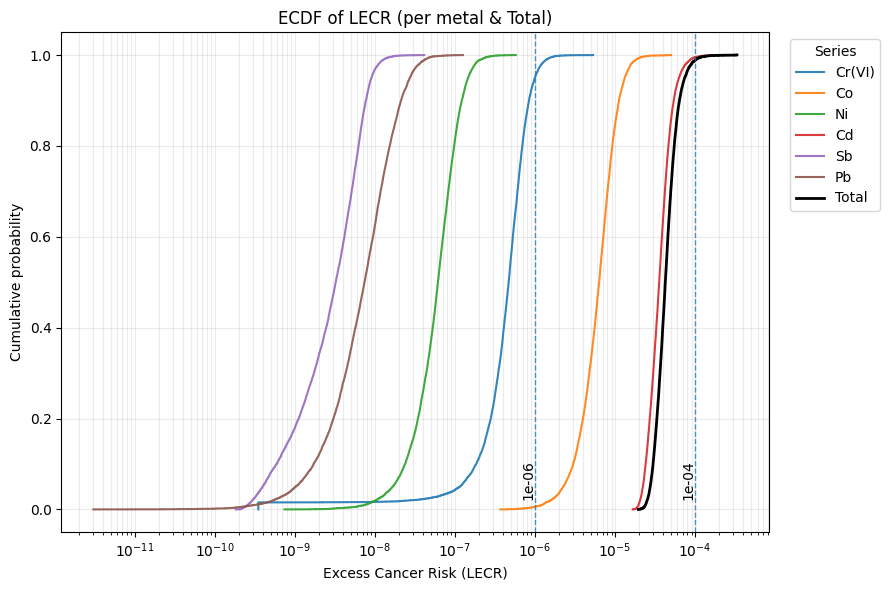

In [ ]:
# 금속별 LECR 누적확률분포 그래프
import numpy as np
import matplotlib.pyplot as plt

def ecdf(arr: np.ndarray):
    x = np.asarray(arr, dtype=float)
    x = x[np.isfinite(x)]
    if x.size == 0:
        return np.array([]), np.array([])
    x = np.sort(x)
    n = x.size
    F = np.arange(1, n+1) / n
    return x, F

def make_positive_for_log(x: np.ndarray, fallback=1e-18):
    x = np.asarray(x, dtype=float)
    pos = x[x > 0]
    if pos.size == 0:
        return np.full_like(x, fallback)
    eps = float(np.min(pos)) * 0.5
    eps = eps if eps > 0 else float(fallback)
    return np.where(x > 0, x, eps)

# 1) 금속별 LECR
lecr_per_metal = {}
for m in ORDER:
    if (m in IUR) and (m in C_sims):
        lecr_per_metal[m] = C_sims[m] * Kg['Lifetime'] * IUR[m]

# 2) Total LECR (금속별 합)
cumulative_lecr = None
if lecr_per_metal:
    cumulative_lecr = np.sum(list(lecr_per_metal.values()), axis=0)

# 3) ECDF 그리기
plt.figure(figsize=(9, 6))

# 금속별
for m, v in lecr_per_metal.items():
    v_plot = make_positive_for_log(v)
    x, y = ecdf(v_plot)
    if x.size > 0:
        plt.step(x, y, where='post', label=m, alpha=0.9)

# Total LECR (금속별 합)
if cumulative_lecr is not None:
    v_total = make_positive_for_log(cumulative_lecr)
    x_all, y_all = ecdf(v_total)
    if x_all.size > 0:
        plt.step(x_all, y_all, where='post', label="Total",
                 linewidth=2.0, color='Black')

# 기준선 (1e-6, 1e-4)
for ref in [1e-6, 1e-4]:
    plt.axvline(ref, linestyle='--', linewidth=1, alpha=0.8)
    plt.text(ref, 0.02, f"{ref:.0e}", rotation=90, va='bottom', ha='right')

# 서식 설정
plt.xscale('log')
plt.xlabel('Excess Cancer Risk (LECR)')
plt.ylabel('Cumulative probability')
plt.title('ECDF of LECR (per metal & Total)')
plt.grid(True, which='both', axis='both', alpha=0.25)
plt.legend(title='Series', loc='upper left', bbox_to_anchor=(1.02, 1.0))
plt.tight_layout()
plt.show()

In [11]:
# ===========================================
# 금속별 LECR 검증 요약표 생성 (+ 금속별 상위 리스크(P95, P99) 포함)
#  - (A) 단일연령 18–<25
#  - (B) 전생애
# 출력: Metal, Scope, C(µg/m³), DET, MC_mean, P95, P99, Δ%, DET∈95%CI
# ===========================================
import numpy as np
import pandas as pd
from scipy import stats

# -----------------------------
# [설정] 시뮬레이션 개수/임계
# -----------------------------
N_SIM = 10_000        # 난수 개수
RANDOM_SEED = 42
CI_Z = 1.96           # 95% CI
TOL_PCT = 1.0         # Δ% 기준 허용오차 기준(%)

# ----------------------------------------
# [입력]
#  - 엑셀 업로드 -> 상하위 5% 트리밍 평균(ng/m³) -> µg/m³변환
# ----------------------------------------
try:
    MANUAL_C
except NameError:
    from google.colab import files
    uploaded = files.upload()
    file_name = list(uploaded.keys())[0]
    df_tmp = pd.read_excel(file_name, sheet_name="Sheet1")
    metals_cols = ["Cr(ng/m3)", "Co(ng/m3)", "Ni(ng/m3)", "Cd(ng/m3)", "Sb(ng/m3)", "Pb(ng/m3)"]
    trim_means_ng = {}
    for col in metals_cols:
        vals = pd.to_numeric(df_tmp[col], errors='coerce').dropna().values
        trim_means_ng[col] = stats.trim_mean(vals, 0.05)
    MANUAL_C = {k.split("(")[0]: v/1000.0 for k, v in trim_means_ng.items()}
    MANUAL_C["Cr(VI)"] = MANUAL_C["Cr"]/7.0
    print("[INFO] MANUAL_C를 트리밍 평균으로 생성했습니다:", MANUAL_C)

# -----------------------------
# [노출 파라미터/함수]
# -----------------------------
AGE_ORDER=["0-<1","1-<2","2-<3","3-<6","6-<11","11-<16","16-<18",
           "18-<25","25-<35","35-<45","45-<55","55-<65","65-<78.6"]

ACT_POINT={"0-<1":24,"1-<2":84,"2-<3":120,"3-<6":108,"6-<11":132,"11-<16":102,"16-<18":102}

ED_years={"0-<1":1,"1-<2":1,"2-<3":1,"3-<6":3,"6-<11":5,"11-<16":5,"16-<18":2,
          "18-<25":7,"25-<35":10,"35-<45":10,"45-<55":10,"55-<65":10,"65-<78.6":13.6}

def ADAF(lbl):
    a=float(lbl.split('-')[0])
    if a<2: return 10.0
    elif a<18: return 3.0
    else: return 1.0

IUR={"Cr(VI)":1.20e-02,"Co":9.00e-03,"Ni":2.40e-04,"Cd":1.80e-03,"Sb":2.29e-06,"Pb":1.20e-05}

# 성인 시간분포 파라미터(p5, p95) -> 로그정규
ACT_LN_P5_P95={"18-<25":(14.455,250.0),"25-<35":(6.516,220.0),"35-<45":(5.789,195.0),
               "45-<55":(6.401,260.0),"55-<65":(8.083,350.0),"65-<78.6":(6.094,390.0)}

# 성인 평균(결정론)
ADULT_MEAN_MIN={"18-<25":87.5,"25-<35":67.1,"35-<45":59.5,
                "45-<55":76.9,"55-<65":102.5,"65-<78.6":108.4}

def mu_sigma_from_p5p95(p5,p95):
    z95=1.6448536269514722
    ln5,ln95=np.log(p5),np.log(p95)
    sg=(ln95-ln5)/(2*z95); mu=(ln5+ln95)/2
    return mu,sg

def sample_minutes(age, n):
    if age in ACT_POINT:
        return np.full(n, float(ACT_POINT[age]), dtype=float)
    mu,sg=mu_sigma_from_p5p95(*ACT_LN_P5_P95[age])
    return np.random.lognormal(mu,sg,size=n)

def K_term(minutes_per_day, age_lbl, EF_days_per_year=350.0, LT_years=78.6):
    return (minutes_per_day/1440.0) * (EF_days_per_year/365.0) * (ED_years[age_lbl]/LT_years) * ADAF(age_lbl)

def lifetime_K_deterministic():
    K=0.0
    for age in AGE_ORDER:
        mins=float(ACT_POINT[age]) if age in ACT_POINT else float(ADULT_MEAN_MIN[age])
        K+=K_term(mins, age)
    return K

# -----------------------------
# [통계/판정 헬퍼]
# -----------------------------
def summarize_det_mc(det, samples, ci_z=CI_Z):
    samples=np.asarray(samples,float)
    mean=float(np.mean(samples))
    med=float(np.median(samples))
    p95=float(np.percentile(samples,95))
    p99=float(np.percentile(samples,99))
    se=float(np.std(samples, ddof=1)/np.sqrt(samples.size))
    rel = (mean-det)/det*100.0 if det!=0 else np.nan
    lo,hi=mean-ci_z*se, mean+ci_z*se
    in_ci = (lo<=det<=hi)
    return dict(DET=det, MC_mean=mean, SE=se, CI_low=lo, CI_high=hi, DET_in_CI=in_ci,
                median=med, P95=p95, P99=p99, DeltaPct=rel)

# -----------------------------
# [핵심] A: 단일연령(18–<25) / B: 전생애 요약표
# -----------------------------
np.random.seed(RANDOM_SEED)
metals = ["Cr(VI)","Co","Ni","Cd","Sb","Pb"]
rows=[]

for m in metals:
    C = float(MANUAL_C[m])  # µg/m³
    iur = IUR[m]

    # ----- (A) 단일연령 18–<25 -----
    age="18-<25"
    det_A = C * iur * K_term(ADULT_MEAN_MIN[age], age)
    mins_A = sample_minutes(age, N_SIM)
    mc_A   = C * iur * K_term(mins_A, age)
    sA = summarize_det_mc(det_A, mc_A)
    rows.append(dict(Metal=m, Scope="A:SingleAge(18-<25)", C_ugm3=C,
                     DET=sA["DET"], MC_mean=sA["MC_mean"], P95=sA["P95"], P99=sA["P99"],
                     DeltaPct=sA["DeltaPct"], DET_in_95CI=sA["DET_in_CI"]))

    # ----- (B) 전생애 -----
    det_B = C * iur * lifetime_K_deterministic()
    Kg = np.zeros(N_SIM)
    for age in AGE_ORDER:
        mins = sample_minutes(age, N_SIM)
        Kg += K_term(mins, age)
    mc_B = C * iur * Kg
    sB = summarize_det_mc(det_B, mc_B)
    rows.append(dict(Metal=m, Scope="B:Lifetime", C_ugm3=C,
                     DET=sB["DET"], MC_mean=sB["MC_mean"], P95=sB["P95"], P99=sB["P99"],
                     DeltaPct=sB["DeltaPct"], DET_in_95CI=sB["DET_in_CI"]))

# -----------------------------
# [출력] 표 + 엑셀 저장
# -----------------------------
out = pd.DataFrame(rows)
display_cols = ["Metal","Scope","C_ugm3","DET","MC_mean","P95","P99","DeltaPct","DET_in_95CI"]
out = out[display_cols].copy()

# 반올림
fmt_cols = ["C_ugm3","DET","MC_mean","P95","P99","DeltaPct"]
out[fmt_cols] = out[fmt_cols].astype(float)
out_rounded = out.copy()
out_rounded["C_ugm3"] = out_rounded["C_ugm3"].map(lambda x: f"{x:.6g}")
for c in ["DET","MC_mean","P95","P99"]:
    out_rounded[c] = out_rounded[c].map(lambda x: f"{x:.6e}")
out_rounded["DeltaPct"] = out_rounded["DeltaPct"].map(lambda x: f"{x:+.2f}%")

print("\n===== # 금속별 LECR 검증 요약표 생성 (A: 단일연령 / B: 전생애) =====")
display(out_rounded)

# 엑셀로 저장
# out.to_excel("LECR_summary_A_B.xlsx", index=False, engine="openpyxl")
# print("Saved: LECR_summary_A_B.xlsx")


===== # 금속별 LECR 검증 요약표 생성 (A: 단일연령 / B: 전생애) =====


,Metal,Scope,C_ugm3,DET,MC_mean,P95,P99,DeltaPct,DET_in_95CI
0,Cr(VI),A:SingleAge(18-<25),0.000421635,2.625514e-08,2.629371e-08,7.487537e-08,1.352144e-07,+0.15%,True
1,Cr(VI),B:Lifetime,0.000421635,5.007012e-07,5.002410e-07,7.682599e-07,1.092223e-06,-0.09%,True
2,Co,A:SingleAge(18-<25),0.00767644,3.585080e-07,3.601445e-07,1.059760e-06,1.856601e-06,+0.46%,True
3,Co,B:Lifetime,0.00767644,6.836961e-06,6.849745e-06,1.051035e-05,1.549832e-05,+0.19%,True
4,Ni,A:SingleAge(18-<25),0.00291983,3.636345e-09,3.619481e-09,1.029006e-08,1.778405e-08,-0.46%,True
5,Ni,B:Lifetime,0.00291983,6.934726e-08,6.915108e-08,1.054624e-07,1.485158e-07,-0.28%,True
6,Cd,A:SingleAge(18-<25),0.2127,1.986722e-06,1.964364e-06,5.504975e-06,9.946317e-06,-1.13%,True
7,Cd,B:Lifetime,0.2127,3.788797e-05,3.795010e-05,5.852225e-05,8.583443e-05,+0.16%,True
8,Sb,A:SingleAge(18-<25),0.0165809,1.970329e-10,1.966756e-10,5.670020e-10,1.032081e-09,-0.18%,True
9,Sb,B:Lifetime,0.0165809,3.757534e-09,3.737508e-09,5.702511e-09,8.142138e-09,-0.53%,True
